<font size=6 face='Comic Sans MS' color="#CC000C"><left><b>HEART DISEASE PREDICTION</font>

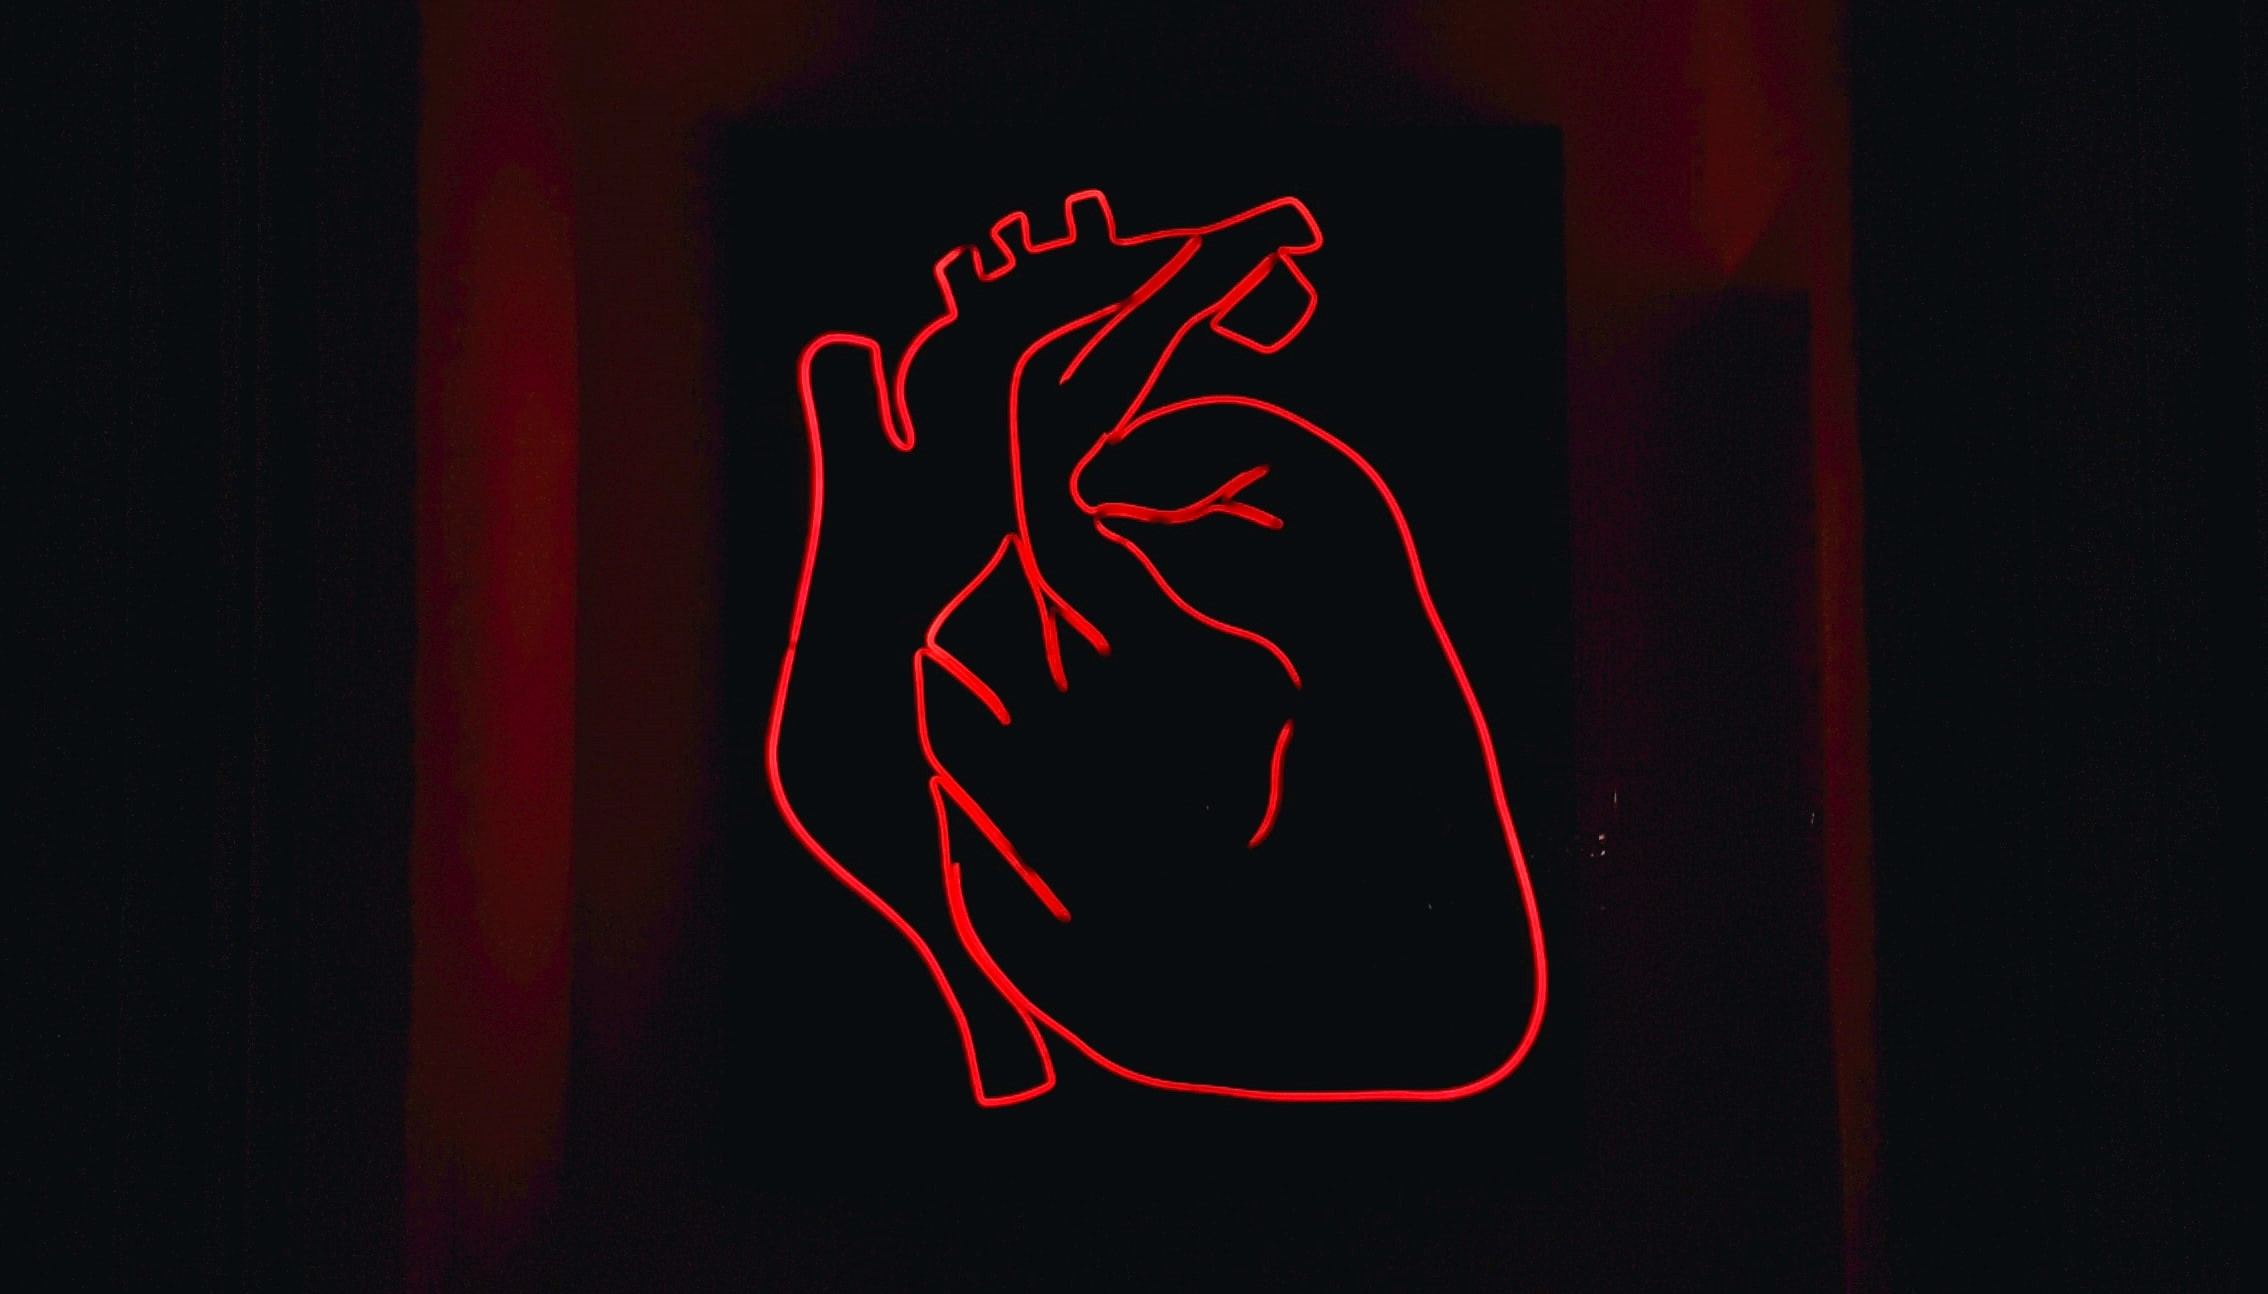

<font size=5 face='Comic Sans MS' color="#CC000C"><left><b>Introduction</font>
    
<font size=3 face='Comic Sans MS' color="#CC000C"><left><b>Problem</font>

1. Cardiovascular diseases (CVDs) are the leading cause of death globally, 
    taking an estimated 17.9 million lives each year.
    
2. Identifying those at highest risk of CVDs and ensuring they receive 
    appropriate treatment can prevent premature deaths.

    (source: [World Health Organization](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1))
        
<font size=3 face='Comic Sans MS' color="#CC000C"><left><b>Proposal</font>

1. To save lives by predicting fatality at the earliest.
2. To avoid human error by automating the process via ML.
    
<font size=3 face='Comic Sans MS' color="#CC000C"><left><b>Motive</font>

1. To predict the disease in a patient by using Machine Learning.

<font size=5 face='Comic Sans MS' color="#CC000C"><left><b>About Data</font>
    
1. This data set dates from 1988 and consists of four databases.
2. It contains 14 attributes, including the predicted attribute.

    - Attribute Information:
    
    1. age == age
    2. sex == sex
    3. cp == chest pain type (4 values)
    4. trestbps == resting blood pressure
    5. chol == serum cholestoral in mg/dl
    6. fbs == fasting blood sugar > 120 mg/dl
    7. restecg == resting electrocardiographic results (values 0,1,2)
    8. thalach == maximum heart rate achieved
    9. exang == exercise induced angina
    10. oldpeak == ST depression induced by exercise relative to rest
    11. slope == the slope of the peak exercise ST segment
    12. ca == number of major vessels (0-3) colored by flourosopy
    13. thal == thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    14. target == valued 0 = no disease; valued 1 = disease. 

### <font size=5 face='Comic Sans MS' color="#CC000C"><left><b>Importing Packages</font>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import missingno as msn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings

In [123]:
warnings.filterwarnings('ignore')

### <font size=5 face='Comic Sans MS' color="#cc000c"><left><b>GETTING DATA</font>

In [2]:
df = pd.read_csv("G:\Others\Data Science - TYPE A\Guvi\Sample Data\\heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### <font size=5 face='Comic Sans MS' color="#cc000c"><left><b>CHECKING FOR NULL & DATA TYPES</font>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

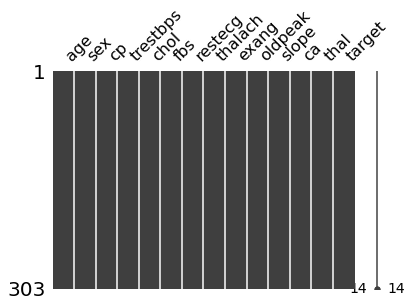

In [14]:
msn.matrix(df,figsize=(6,4))

- Matrix shows that there is no null value

### <font size=5 face='Comic Sans MS' color="#cc000c"><left><b>EXPLORATORY DATA ANALYSIS (EDA)</font>

In [4]:
# Number of healthy and diseased patients in dataset.
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
# Ratio of healthy and diseased patients in dataset.
df.target.value_counts(normalize= True)

1    0.544554
0    0.455446
Name: target, dtype: float64

<AxesSubplot:title={'center':'0=No Disease; 1=Disease'}>

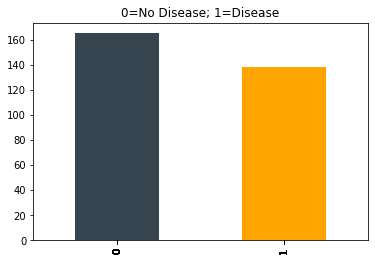

In [30]:
df.target.value_counts().plot(kind='bar', 
                              color=['#36454F','#FFA400'],
                              xticks=df['target'],
                              title='0=No Disease; 1=Disease')

- Data is fairly divided. (not heavely biased)

In [52]:
# Target by type of chest pain
tab = pd.crosstab(df['cp'],df['target'])
tab

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


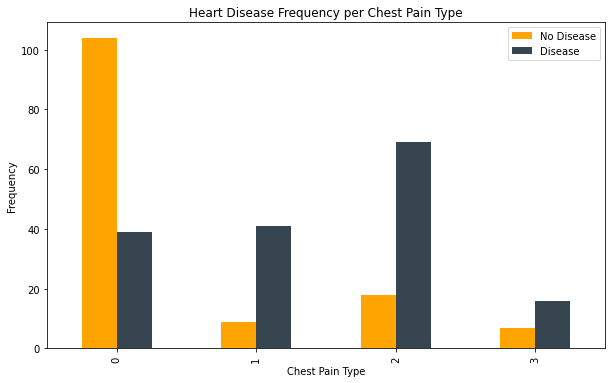

In [17]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['#FFA400','#36454F'])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.legend(["No Disease", "Disease"])
plt.ylabel("Frequency");

 - Looks like people with 'type 0' chest pain usually dont have a heart disease,  
lets find the probability. 

In [56]:
disease = {}
print('Probability of having disease when chest pain is of:')
for i in range(4):
    prob = tab.iloc[i][1]/(tab.iloc[i][0]+tab.iloc[i][1])
    disease['Type'+str(i)]=round(prob*100,2)
    print(f'Type {i} : {prob*100:.2f}%')

Probability of having disease when chest pain is of:
Type 0 : 27.27%
Type 1 : 82.00%
Type 2 : 79.31%
Type 3 : 69.57%


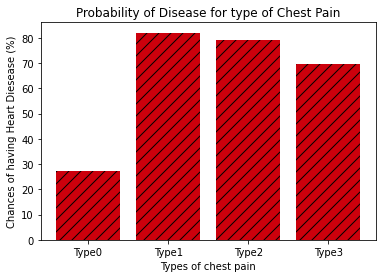

In [171]:
# Plotting the Probability
plt.bar(disease.keys(),disease.values(),color='#cc000c',hatch='//')
plt.title('Probability of Disease for type of Chest Pain')
plt.ylabel('Chances of having Heart Diesease (%)')
plt.xlabel('Types of chest pain')
plt.savefig('image.jpg')
plt.show()

In [8]:
# Statistical summary of each feature
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Men to women (count)
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

- Looks like men report more chest pain than women.

In [10]:
# Men to women (count) by target variable
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


- Women who report a chest pain are more likely to <u>have</u> a heart disease.  
- Men who report a chest pain are more likely to <u>not have</u> a heart disease

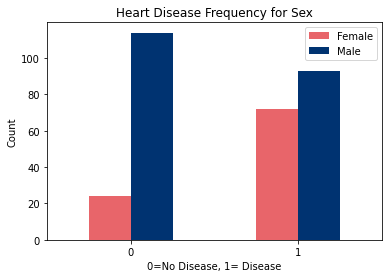

In [11]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['#E8656A','#003371'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel('0=No Disease, 1= Disease')
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

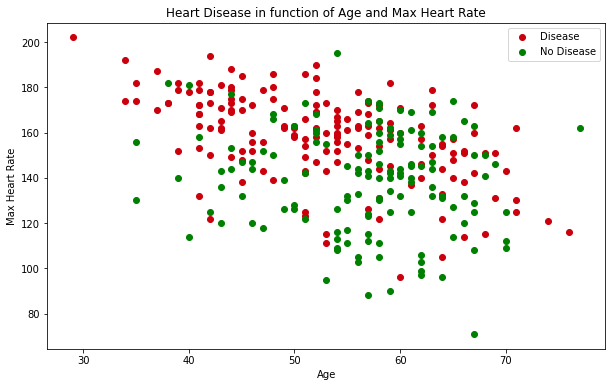

In [94]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="#cc000c") 

plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="green")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

- Young people with higher heart rate are more likely to have a heart disease.
- A healthy heart beats at a rate of 60-100 bpm.

<AxesSubplot:ylabel='Frequency'>

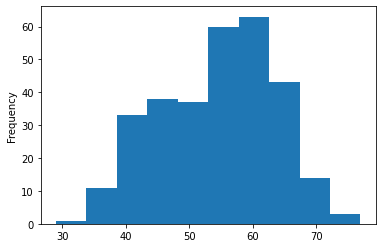

In [14]:
df.age.plot.hist()

- Majority of people seeking medical help are between 55 & 65. 

#### <font size=3 face='Comic Sans MS' color="#cc000c"><left><I>Checking for Correlation</font>

In [18]:
corr_matrix=df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

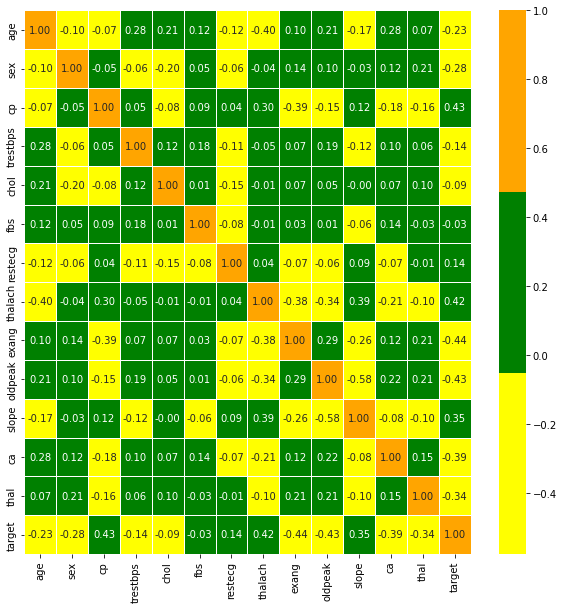

In [29]:
corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.5,
           fmt=".2f",
           cmap=['yellow','green','orange'])

- Since the data was already cleaned and featured engineered,there is no stong  
correlation between features.
- Hence no feature dropping (dimensionality reduction). 

### <font size=5 face='Comic Sans MS' color="#cc000c"><left><b>ML MODELING</font>

In [98]:
# Seperating the dependent and independent variables
X=df.drop("target", axis=1)
y=df.target.values

In [99]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [100]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
# Splitting the data for testing and trainig.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [102]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [103]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

### <font size=2 face='Comic Sans MS' color="#cc000c"><left><b>KNN, LOGISTIC REGRESSION and RANDOM FOREST</font>

In [104]:
models={"KNN":KNeighborsClassifier(),
       "Logistic Regression" : LogisticRegression(),
       "Random Forest": RandomForestClassifier()}

def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [125]:
# Scores of each model
model_scores = fit_score(models= models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

- Logistic Regression is performing better.
- KNN is performing poorly

### <font size=3 face='Comic Sans MS' color="#cc000c"><left><b>HYPERPARAMETER TUNING</font>

### <font size=2 face='Comic Sans MS' color="#cc000c"><left><b>TUNING FOR KNN</font>

In [117]:
train_scores=[]
test_scores=[]

neighbors = range(1, 21)

knn= KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))   

In [118]:
print(train_scores)

[1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058]


Maximmum KNN score on the test data: 75.41%


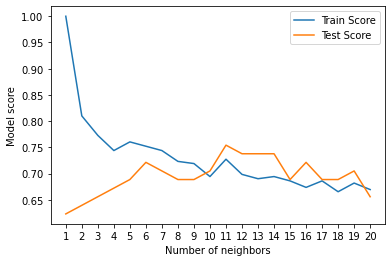

In [34]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")

plt.xticks(np.arange(1, 21, 1))

plt.xlabel("Number of neighbors")
plt.ylabel("Model score")

plt.legend()

print(f"Maximmum KNN score on the test data: {max(test_scores)*100:.2f}%")

- Yet the model isn't good enough when compared with others

In [138]:
# Scaling the data for KNN 
scaler = MinMaxScaler()
xtrain_norm = scaler.fit_transform(X_train)
xtest_norm = scaler.transform(X_test)

In [139]:
train_norm_scores = []
test_norm_scores = []

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(xtrain_norm, y_train)
    
    train_norm_scores.append(knn.score(xtrain_norm, y_train))
    
    test_norm_scores.append(knn.score(xtest_norm, y_test)) 

Maximmum KNN score on the test data: 85.25%


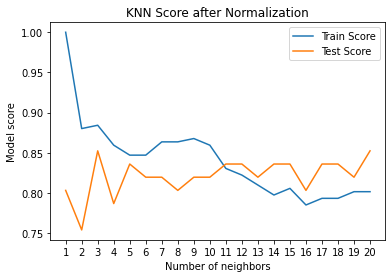

In [140]:
plt.plot(neighbors, train_norm_scores, label = "Train Score")
plt.plot(neighbors, test_norm_scores, label = "Test Score")

plt.xticks(np.arange(1, 21, 1))

plt.title("KNN Score after Normalization")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")

plt.legend()

print(f"Maximmum KNN score on the test data: {max(test_norm_scores)*100:.2f}%")

KNN classifies based on euclidean distance hence was performing  
poorly because the data was not scaled earlier.

### <font size=2 face='Comic Sans MS' color="#cc000c"><left><b>TUNING FOR LOGISTIC REGRESSION (RandomizedSearchCV)</font>

In [150]:
log_reg_grid = {"C": np.linspace(-4,4,20),
               "solver": ["liblinear"]}

In [151]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20, verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [152]:
# Best parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.21052631578947345}

In [153]:
# Highest score
rs_log_reg.score(X_test,y_test)

0.8852459016393442

### <font size=2 face='Comic Sans MS' color="#cc000c"><left><b>TUNING FOR FOREST (RandomizedSearchCV)</font>

In [154]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth":[None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [155]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20, verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [156]:
# Best Parameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [157]:
# Highest Score
rs_rf.score(X_test, y_test)

0.8688524590163934

### <font size=2 face='Comic Sans MS' color="#cc000c"><left><b>TUNING FOR LOGISTIC REGRESSION (GridSearchCV)</font>

In [158]:
log_reg_grid = {"C": np.linspace(-4, 4, 20),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose = True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]),
                         'solver': ['liblinear']},
             verbose=True)

In [159]:
gs_log_reg.best_params_

{'C': 0.21052631578947345, 'solver': 'liblinear'}

In [160]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [167]:
clf = LogisticRegression(C=0.21052631578947345,
                        solver="liblinear")

cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')

cv_acc.mean()

- Logistics Regression is having the highest score among 3.
- It is clear that all 3 models are showing good results.

- As score is not a good measure for classification we cannot  
use it to understand the model hence we use other classification metrics.

### <font size=3 face='Comic Sans MS' color="#cc000c"><left><b>METRICS</font>

In [170]:
# Confusion Matrix
y_preds = gs_log_reg.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

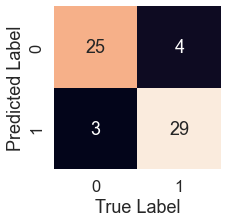

In [55]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot = True,
                  cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)
    

- Out of 61 test samples only 7 have been wrongly identified,  
& 54 have been correctly identified.

In [56]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



- Precision,recall and their harmonic mean are all indicating at  
a good model.

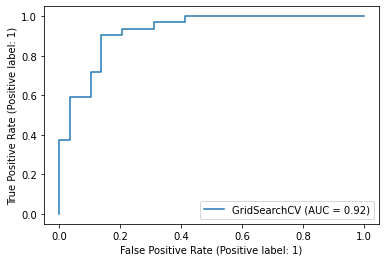

In [164]:
plot_roc_curve(gs_log_reg, X_test, y_test)

- The ROC curve is very close to ideal condition hence we can say  
that the model is reliable.